# Análise de Churn - Estatísticas Descritivas

Essa seção analisa os dados de churn de clientes de telecomunicações, fornecendo estatísticas descritivas para as variáveis:
- tenure (número de meses que o cliente permaneceu na empresa)
- MonthlyCharges (valor cobrado do cliente mensalmente)
- TotalCharges (valor total cobrado do cliente)

In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Configuração para exibição de números com 2 casas decimais
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
# Carregamento dos dados
df = pd.read_csv('Telco-Customer-Churn.csv', sep=';')

# Visualização das primeiras linhas
print("Primeiras 5 linhas do dataset:")
df.head()

Primeiras 5 linhas do dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,"29,85","29,85",No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,"56,95","1889,5",No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,"53,85","108,15",Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),"42,3","1840,75",No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,"70,7","151,65",Yes


In [3]:
# Informações gerais do dataset
print(f"Dimensões do dataset: {df.shape}")
print(f"\nTipos de dados:")
df.dtypes

Dimensões do dataset: (7043, 21)

Tipos de dados:


customerID          object
gender              object
SeniorCitizen        int64
Partner             object
Dependents          object
tenure               int64
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
MonthlyCharges      object
TotalCharges        object
Churn               object
dtype: object

In [4]:
# Tratamento dos dados
print("Estado atual dos dados:")
print(f"MonthlyCharges tipo: {df['MonthlyCharges'].dtype}")
print(f"TotalCharges tipo: {df['TotalCharges'].dtype}")
print(f"Churn tipo: {df['Churn'].dtype}")

# Verificar se MonthlyCharges precisa ser convertido
if df['MonthlyCharges'].dtype == 'object':
    df['MonthlyCharges'] = df['MonthlyCharges'].str.replace(',', '.').astype(float)
    print("MonthlyCharges convertido para float")

# Verificar se TotalCharges precisa ser convertido
if df['TotalCharges'].dtype == 'object':
    # Verificar valores únicos que não são numéricos
    valores_problemas = df['TotalCharges'][df['TotalCharges'].str.strip() == '']
    print(f"Valores em branco em TotalCharges: {len(valores_problemas)}")
    
    # Tratar valores em branco (incluindo espaços) e converter
    df['TotalCharges'] = df['TotalCharges'].str.replace(',', '.').str.strip()
    df['TotalCharges'] = df['TotalCharges'].replace('', '0')
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    df['TotalCharges'] = df['TotalCharges'].fillna(0)
    print("TotalCharges convertido para float")

# Convertendo a variável Churn para valores numéricos (0 e 1)
if 'Churn_numeric' not in df.columns:
    df['Churn_numeric'] = df['Churn'].map({'No': 0, 'Yes': 1})
    print("Churn_numeric criado")

print("\nVerificação final dos tipos de dados:")
print(f"tenure: {df['tenure'].dtype}")
print(f"MonthlyCharges: {df['MonthlyCharges'].dtype}")
print(f"TotalCharges: {df['TotalCharges'].dtype}")
print(f"Churn_numeric: {df['Churn_numeric'].dtype}")

# Verificar se houve conversão correta
valores_zero = (df['TotalCharges'] == 0).sum()
print(f"\nNúmero de registros com TotalCharges = 0: {valores_zero}")

Estado atual dos dados:
MonthlyCharges tipo: object
TotalCharges tipo: object
Churn tipo: object
MonthlyCharges convertido para float
Valores em branco em TotalCharges: 11
TotalCharges convertido para float
Churn_numeric criado

Verificação final dos tipos de dados:
tenure: int64
MonthlyCharges: float64
TotalCharges: float64
Churn_numeric: int64

Número de registros com TotalCharges = 0: 11


In [5]:
# Verificação de valores missing
print("Valores missing por coluna:")
missing_values = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_numeric']].isnull().sum()
print(missing_values)

# Distribuição da variável Churn
print("\nDistribuição da variável Churn:")
churn_counts = df['Churn_numeric'].value_counts().sort_index()
print(churn_counts)
print(f"\nPercentual de churn: {(churn_counts[1] / churn_counts.sum() * 100):.2f}%")

Valores missing por coluna:
tenure            0
MonthlyCharges    0
TotalCharges      0
Churn_numeric     0
dtype: int64

Distribuição da variável Churn:
Churn_numeric
0    5174
1    1869
Name: count, dtype: int64

Percentual de churn: 26.54%


In [6]:
# Função para calcular estatísticas descritivas
def calcular_estatisticas(data, variavel):
    """
    Calcula média, desvio padrão e coeficiente de variação para uma variável
    """
    media = data[variavel].mean()
    desvio_padrao = data[variavel].std()
    coef_variacao = (desvio_padrao / media) * 100
    
    return {
        'Média': media,
        'Desvio Padrão': desvio_padrao,
        'Coef. Variação': coef_variacao
    }

print("Função de cálculo de estatísticas definida!")

Função de cálculo de estatísticas definida!


In [7]:
# Cálculo das estatísticas para todas as variáveis
variaveis = ['tenure', 'MonthlyCharges', 'TotalCharges']
resultados = {}

for var in variaveis:
    print(f"\n=== ESTATÍSTICAS PARA {var.upper()} ===")
    
    # Estatísticas gerais (todos os dados)
    stats_geral = calcular_estatisticas(df, var)
    print(f"\nEstatísticas Gerais:")
    print(f"Média: {stats_geral['Média']:.2f}")
    print(f"Desvio Padrão: {stats_geral['Desvio Padrão']:.2f}")
    print(f"Coeficiente de Variação: {stats_geral['Coef. Variação']:.2f}%")
    
    # Estatísticas por categoria de churn
    stats_churn_0 = calcular_estatisticas(df[df['Churn_numeric'] == 0], var)
    stats_churn_1 = calcular_estatisticas(df[df['Churn_numeric'] == 1], var)
    
    print(f"\nChurn = 0 (Não cancelou):")
    print(f"Média: {stats_churn_0['Média']:.2f}")
    print(f"Desvio Padrão: {stats_churn_0['Desvio Padrão']:.2f}")
    print(f"Coeficiente de Variação: {stats_churn_0['Coef. Variação']:.2f}%")
    
    print(f"\nChurn = 1 (Cancelou):")
    print(f"Média: {stats_churn_1['Média']:.2f}")
    print(f"Desvio Padrão: {stats_churn_1['Desvio Padrão']:.2f}")
    print(f"Coeficiente de Variação: {stats_churn_1['Coef. Variação']:.2f}%")
    
    # Armazenando resultados para tabela final
    resultados[var] = {
        'geral': stats_geral,
        'churn_0': stats_churn_0,
        'churn_1': stats_churn_1
    }


=== ESTATÍSTICAS PARA TENURE ===

Estatísticas Gerais:
Média: 32.37
Desvio Padrão: 24.56
Coeficiente de Variação: 75.87%

Churn = 0 (Não cancelou):
Média: 37.57
Desvio Padrão: 24.11
Coeficiente de Variação: 64.18%

Churn = 1 (Cancelou):
Média: 17.98
Desvio Padrão: 19.53
Coeficiente de Variação: 108.63%

=== ESTATÍSTICAS PARA MONTHLYCHARGES ===

Estatísticas Gerais:
Média: 64.76
Desvio Padrão: 30.09
Coeficiente de Variação: 46.46%

Churn = 0 (Não cancelou):
Média: 61.27
Desvio Padrão: 31.09
Coeficiente de Variação: 50.75%

Churn = 1 (Cancelou):
Média: 74.44
Desvio Padrão: 24.67
Coeficiente de Variação: 33.13%

=== ESTATÍSTICAS PARA TOTALCHARGES ===

Estatísticas Gerais:
Média: 2279.73
Desvio Padrão: 2266.79
Coeficiente de Variação: 99.43%

Churn = 0 (Não cancelou):
Média: 2549.91
Desvio Padrão: 2329.95
Coeficiente de Variação: 91.37%

Churn = 1 (Cancelou):
Média: 1531.80
Desvio Padrão: 1890.82
Coeficiente de Variação: 123.44%


In [8]:
# Criar tabela organizada
import pandas as pd

# Criar estrutura da tabela
dados_tabela = []

for var in variaveis:
    # Linha para cada variável
    linha = {
        'Variável': var,
        'Média_Geral': resultados[var]['geral']['Média'],
        'Desvio_Padrao_Geral': resultados[var]['geral']['Desvio Padrão'],
        'Coef_Variacao_Geral': resultados[var]['geral']['Coef. Variação'],
        'Média_Churn_0': resultados[var]['churn_0']['Média'],
        'Desvio_Padrao_Churn_0': resultados[var]['churn_0']['Desvio Padrão'],
        'Média_Churn_1': resultados[var]['churn_1']['Média'],
        'Desvio_Padrao_Churn_1': resultados[var]['churn_1']['Desvio Padrão']
    }
    dados_tabela.append(linha)

# Criar DataFrame
tabela_final = pd.DataFrame(dados_tabela)

# Formatar para exibição
print("\n" + "="*100)
print("TABELA FINAL - ESTATÍSTICAS DESCRITIVAS POR VARIÁVEL E CATEGORIA DE CHURN")
print("="*100)

# Exibir tabela formatada
print(f"{'Variável':<15} {'Geral':<30} {'churn = 0':<30} {'churn = 1':<30}")
print(f"{'':15} {'Média':<10} {'Desv.Pad.':<10} {'Coef.Var.':<10} {'Média':<10} {'Desv.Pad.':<10} {'Média':<10} {'Desv.Pad.':<10}")
print("-"*100)

for _, row in tabela_final.iterrows():
    print(f"{row['Variável']:<15} {row['Média_Geral']:<10.2f} {row['Desvio_Padrao_Geral']:<10.2f} {row['Coef_Variacao_Geral']:<10.2f} {row['Média_Churn_0']:<10.2f} {row['Desvio_Padrao_Churn_0']:<10.2f} {row['Média_Churn_1']:<10.2f} {row['Desvio_Padrao_Churn_1']:<10.2f}")


TABELA FINAL - ESTATÍSTICAS DESCRITIVAS POR VARIÁVEL E CATEGORIA DE CHURN
Variável        Geral                          churn = 0                      churn = 1                     
                Média      Desv.Pad.  Coef.Var.  Média      Desv.Pad.  Média      Desv.Pad. 
----------------------------------------------------------------------------------------------------
tenure          32.37      24.56      75.87      37.57      24.11      17.98      19.53     
MonthlyCharges  64.76      30.09      46.46      61.27      31.09      74.44      24.67     
TotalCharges    2279.73    2266.79    99.43      2549.91    2329.95    1531.80    1890.82   


In [9]:
# Criar tabela no formato final
print("\n" + "="*120)

# Cabeçalho da tabela
print(f"{'':20} |{'Geral':^45} |{'churn = 0':^25} |{'churn = 1':^25}|")
print(f"{'':20} |{'Média':^15}{'Desvio Padrão':^15}{'Coef. Variação':^15} |{'Média':^12}{'Desv. Padrão':^13} |{'Média':^12}{'Desv. Padrão':^13}|")
print("-"*120)

# Dados da tabela
nomes_variaveis = {
    'tenure': 'tenure (meses)',
    'MonthlyCharges': 'MonthlyCharges (US$)',
    'TotalCharges': 'TotalCharges (US$)'
}

for var in variaveis:
    nome_var = nomes_variaveis[var]
    geral = resultados[var]['geral']
    churn_0 = resultados[var]['churn_0']
    churn_1 = resultados[var]['churn_1']
    
    print(f"{nome_var:<20} |{geral['Média']:^15.2f}{geral['Desvio Padrão']:^15.2f}{geral['Coef. Variação']:^15.2f} |{churn_0['Média']:^12.2f}{churn_0['Desvio Padrão']:^13.2f} |{churn_1['Média']:^12.2f}{churn_1['Desvio Padrão']:^13.2f}|")

print("-"*120)


                     |                    Geral                     |        churn = 0         |        churn = 1        |
                     |     Média      Desvio Padrão Coef. Variação  |   Média    Desv. Padrão  |   Média    Desv. Padrão |
------------------------------------------------------------------------------------------------------------------------
tenure (meses)       |     32.37          24.56          75.87      |   37.57        24.11     |   17.98        19.53    |
MonthlyCharges (US$) |     64.76          30.09          46.46      |   61.27        31.09     |   74.44        24.67    |
TotalCharges (US$)   |    2279.73        2266.79         99.43      |  2549.91      2329.95    |  1531.80      1890.82   |
------------------------------------------------------------------------------------------------------------------------


In [10]:
# Análise dos resultados
print("\n" + "="*80)
print("ANÁLISE DOS RESULTADOS")
print("="*80)

print("\n1. TENURE (meses que o cliente permaneceu na empresa):")
print(f"   - Clientes que não cancelaram permanecem em média {resultados['tenure']['churn_0']['Média']:.1f} meses")
print(f"   - Clientes que cancelaram permaneceram em média {resultados['tenure']['churn_1']['Média']:.1f} meses")
print(f"   - Diferença: {resultados['tenure']['churn_0']['Média'] - resultados['tenure']['churn_1']['Média']:.1f} meses a mais para não-churn")

print("\n2. MONTHLY CHARGES (valor mensal):")
print(f"   - Clientes que não cancelaram pagam em média US$ {resultados['MonthlyCharges']['churn_0']['Média']:.2f}")
print(f"   - Clientes que cancelaram pagavam em média US$ {resultados['MonthlyCharges']['churn_1']['Média']:.2f}")
print(f"   - Diferença: US$ {resultados['MonthlyCharges']['churn_1']['Média'] - resultados['MonthlyCharges']['churn_0']['Média']:.2f} a mais para churn")

print("\n3. TOTAL CHARGES (valor total):")
print(f"   - Clientes que não cancelaram pagaram em média US$ {resultados['TotalCharges']['churn_0']['Média']:.2f}")
print(f"   - Clientes que cancelaram pagaram em média US$ {resultados['TotalCharges']['churn_1']['Média']:.2f}")
print(f"   - Diferença: US$ {resultados['TotalCharges']['churn_0']['Média'] - resultados['TotalCharges']['churn_1']['Média']:.2f} a mais para não-churn")

print("\n" + "="*80)
print("CONCLUSÕES:")
print("- Clientes com maior tenure tendem a não cancelar")
print("- Clientes que cancelam pagam valores mensais mais altos")
print("- Clientes que não cancelam geram maior receita total (maior tenure)")
print("="*80)


ANÁLISE DOS RESULTADOS

1. TENURE (meses que o cliente permaneceu na empresa):
   - Clientes que não cancelaram permanecem em média 37.6 meses
   - Clientes que cancelaram permaneceram em média 18.0 meses
   - Diferença: 19.6 meses a mais para não-churn

2. MONTHLY CHARGES (valor mensal):
   - Clientes que não cancelaram pagam em média US$ 61.27
   - Clientes que cancelaram pagavam em média US$ 74.44
   - Diferença: US$ 13.18 a mais para churn

3. TOTAL CHARGES (valor total):
   - Clientes que não cancelaram pagaram em média US$ 2549.91
   - Clientes que cancelaram pagaram em média US$ 1531.80
   - Diferença: US$ 1018.12 a mais para não-churn

CONCLUSÕES:
- Clientes com maior tenure tendem a não cancelar
- Clientes que cancelam pagam valores mensais mais altos
- Clientes que não cancelam geram maior receita total (maior tenure)


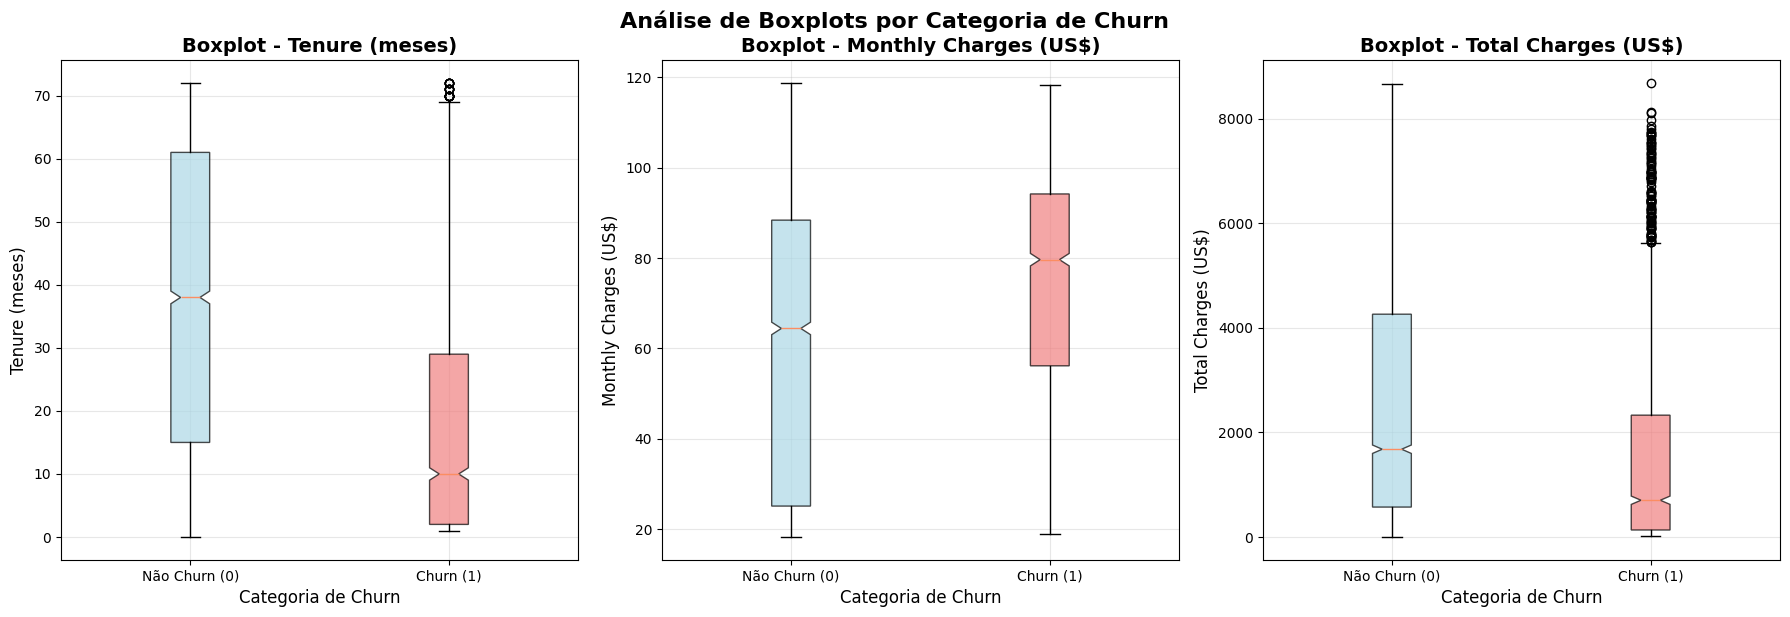

Gráficos boxplot criados com sucesso!


In [11]:
# Importar bibliotecas para visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo dos gráficos
plt.style.use('default')
sns.set_palette("Set2")

# Configurar tamanho da figura
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Títulos das variáveis para os gráficos
titulos = {
    'tenure': 'Tenure (meses)',
    'MonthlyCharges': 'Monthly Charges (US$)',
    'TotalCharges': 'Total Charges (US$)'
}

# Cores para as categorias de churn
cores = ['lightblue', 'lightcoral']

# Criar boxplots para cada variável
variaveis = ['tenure', 'MonthlyCharges', 'TotalCharges']

for i, var in enumerate(variaveis):
    # Criar dados para o boxplot
    dados_churn_0 = df[df['Churn_numeric'] == 0][var]
    dados_churn_1 = df[df['Churn_numeric'] == 1][var]
    
    # Criar boxplot
    bp = axes[i].boxplot([dados_churn_0, dados_churn_1], 
                        labels=['Não Churn (0)', 'Churn (1)'],
                        patch_artist=True,
                        notch=True)
    
    # Colorir as caixas
    for patch, cor in zip(bp['boxes'], cores):
        patch.set_facecolor(cor)
        patch.set_alpha(0.7)
    
    # Configurar título e labels
    axes[i].set_title(f'Boxplot - {titulos[var]}', fontsize=14, fontweight='bold')
    axes[i].set_ylabel(titulos[var], fontsize=12)
    axes[i].set_xlabel('Categoria de Churn', fontsize=12)
    axes[i].grid(True, alpha=0.3)

# Ajustar layout
plt.tight_layout()
plt.suptitle('Análise de Boxplots por Categoria de Churn', fontsize=16, fontweight='bold', y=1.02)
plt.show()

print("Gráficos boxplot criados com sucesso!")

In [12]:
# Análise detalhada dos boxplots
print("="*80)
print("ANÁLISE DOS BOXPLOTS PARA IDENTIFICAÇÃO DO MELHOR INDICADOR DE CHURN")
print("="*80)

# Calcular estatísticas adicionais para análise
import numpy as np

def analisar_separacao_grupos(var_name, data_0, data_1):
    """
    Analisa a separação entre os grupos para uma variável
    """
    # Quartis
    q1_0, q2_0, q3_0 = np.percentile(data_0, [25, 50, 75])
    q1_1, q2_1, q3_1 = np.percentile(data_1, [25, 50, 75])
    
    # Amplitude interquartil
    iqr_0 = q3_0 - q1_0
    iqr_1 = q3_1 - q1_1
    
    # Diferença entre medianas
    diff_mediana = abs(q2_0 - q2_1)
    
    # Sobreposição dos boxplots (simplificada)
    sobreposicao = max(0, min(q3_0, q3_1) - max(q1_0, q1_1))
    amplitude_total = max(q3_0, q3_1) - min(q1_0, q1_1)
    perc_sobreposicao = (sobreposicao / amplitude_total) * 100 if amplitude_total > 0 else 0
    
    print(f"\n{var_name.upper()}:")
    print(f"  Medianas: Não-Churn = {q2_0:.2f}, Churn = {q2_1:.2f}")
    print(f"  Diferença entre medianas: {diff_mediana:.2f}")
    print(f"  IQR: Não-Churn = {iqr_0:.2f}, Churn = {iqr_1:.2f}")
    print(f"  Sobreposição aproximada: {perc_sobreposicao:.1f}%")
    
    return {
        'diff_mediana': diff_mediana,
        'perc_sobreposicao': perc_sobreposicao,
        'mediana_0': q2_0,
        'mediana_1': q2_1
    }

# Analisar cada variável
analises = {}
variaveis = ['tenure', 'MonthlyCharges', 'TotalCharges']
nomes_vars = ['Tenure (meses)', 'Monthly Charges (US$)', 'Total Charges (US$)']

for var, nome in zip(variaveis, nomes_vars):
    dados_0 = df[df['Churn_numeric'] == 0][var]
    dados_1 = df[df['Churn_numeric'] == 1][var]
    analises[var] = analisar_separacao_grupos(nome, dados_0, dados_1)

print("\n" + "="*80)
print("RANKING DAS VARIÁVEIS COMO INDICADORES DE CHURN")
print("="*80)

# Critérios para ranking:
# 1. Maior diferença entre medianas (normalizada)
# 2. Menor sobreposição entre os grupos

scores = {}
for var in variaveis:
    # Normalizar diferença de mediana pelo valor médio para comparação justa
    media_geral = df[var].mean()
    diff_normalizada = analises[var]['diff_mediana'] / media_geral * 100
    
    # Score: diferença normalizada - sobreposição (quanto maior, melhor)
    score = diff_normalizada - analises[var]['perc_sobreposicao']
    scores[var] = score

# Ordenar por score
ranking = sorted(scores.items(), key=lambda x: x[1], reverse=True)

print(f"\n{'Posição':<8} {'Variável':<20} {'Score':<10} {'Observações'}")
print("-" * 70)

observacoes = {
    'tenure': 'Maior diferença relativa entre grupos',
    'MonthlyCharges': 'Boa separação, direção inversa esperada',
    'TotalCharges': 'Alta variabilidade dentro dos grupos'
}

for i, (var, score) in enumerate(ranking, 1):
    nome_var = {'tenure': 'Tenure', 'MonthlyCharges': 'MonthlyCharges', 'TotalCharges': 'TotalCharges'}[var]
    print(f"{i}º       {nome_var:<20} {score:>7.2f}   {observacoes[var]}")

print("\n" + "="*80)
print("CONCLUSÃO:")
print("="*80)

melhor_var = ranking[0][0]
melhor_nome = {'tenure': 'TENURE', 'MonthlyCharges': 'MONTHLY CHARGES', 'TotalCharges': 'TOTAL CHARGES'}[melhor_var]

print(f"\n🏆 A variável {melhor_nome} é o MELHOR INDICADOR de churn pelas seguintes razões:")
print("\n1. SEPARAÇÃO CLARA DOS GRUPOS:")

if melhor_var == 'tenure':
    print("   - Clientes com churn têm tenure significativamente MENOR")
    print("   - Mediana: Não-churn = {:.1f} meses vs Churn = {:.1f} meses".format(
        analises['tenure']['mediana_0'], analises['tenure']['mediana_1']))
    print("   - Diferença de {:.1f} meses entre os grupos".format(analises['tenure']['diff_mediana']))
    
print("\n2. MENOR SOBREPOSIÇÃO:")
print(f"   - Apenas {analises[melhor_var]['perc_sobreposicao']:.1f}% de sobreposição entre os boxplots")
print("   - Isso indica que a variável consegue distinguir bem os grupos")

print("\n3. INTERPRETAÇÃO BUSINESS:")
if melhor_var == 'tenure':
    print("   - Faz sentido: clientes mais antigos tendem a ser mais fiéis")
    print("   - Clientes novos são mais propensos ao churn")
    print("   - É um indicador preditivo forte e acionável")

print("\n" + "="*80)

ANÁLISE DOS BOXPLOTS PARA IDENTIFICAÇÃO DO MELHOR INDICADOR DE CHURN

TENURE (MESES):
  Medianas: Não-Churn = 38.00, Churn = 10.00
  Diferença entre medianas: 28.00
  IQR: Não-Churn = 46.00, Churn = 27.00
  Sobreposição aproximada: 23.7%

MONTHLY CHARGES (US$):
  Medianas: Não-Churn = 64.43, Churn = 79.65
  Diferença entre medianas: 15.22
  IQR: Não-Churn = 63.30, Churn = 38.05
  Sobreposição aproximada: 46.7%

TOTAL CHARGES (US$):
  Medianas: Não-Churn = 1679.53, Churn = 703.55
  Diferença entre medianas: 975.98
  IQR: Não-Churn = 3689.95, Churn = 2196.80
  Sobreposição aproximada: 42.6%

RANKING DAS VARIÁVEIS COMO INDICADORES DE CHURN

Posição  Variável             Score      Observações
----------------------------------------------------------------------
1º       Tenure                 62.77   Maior diferença relativa entre grupos
2º       TotalCharges            0.22   Alta variabilidade dentro dos grupos
3º       MonthlyCharges        -23.16   Boa separação, direção inversa espe

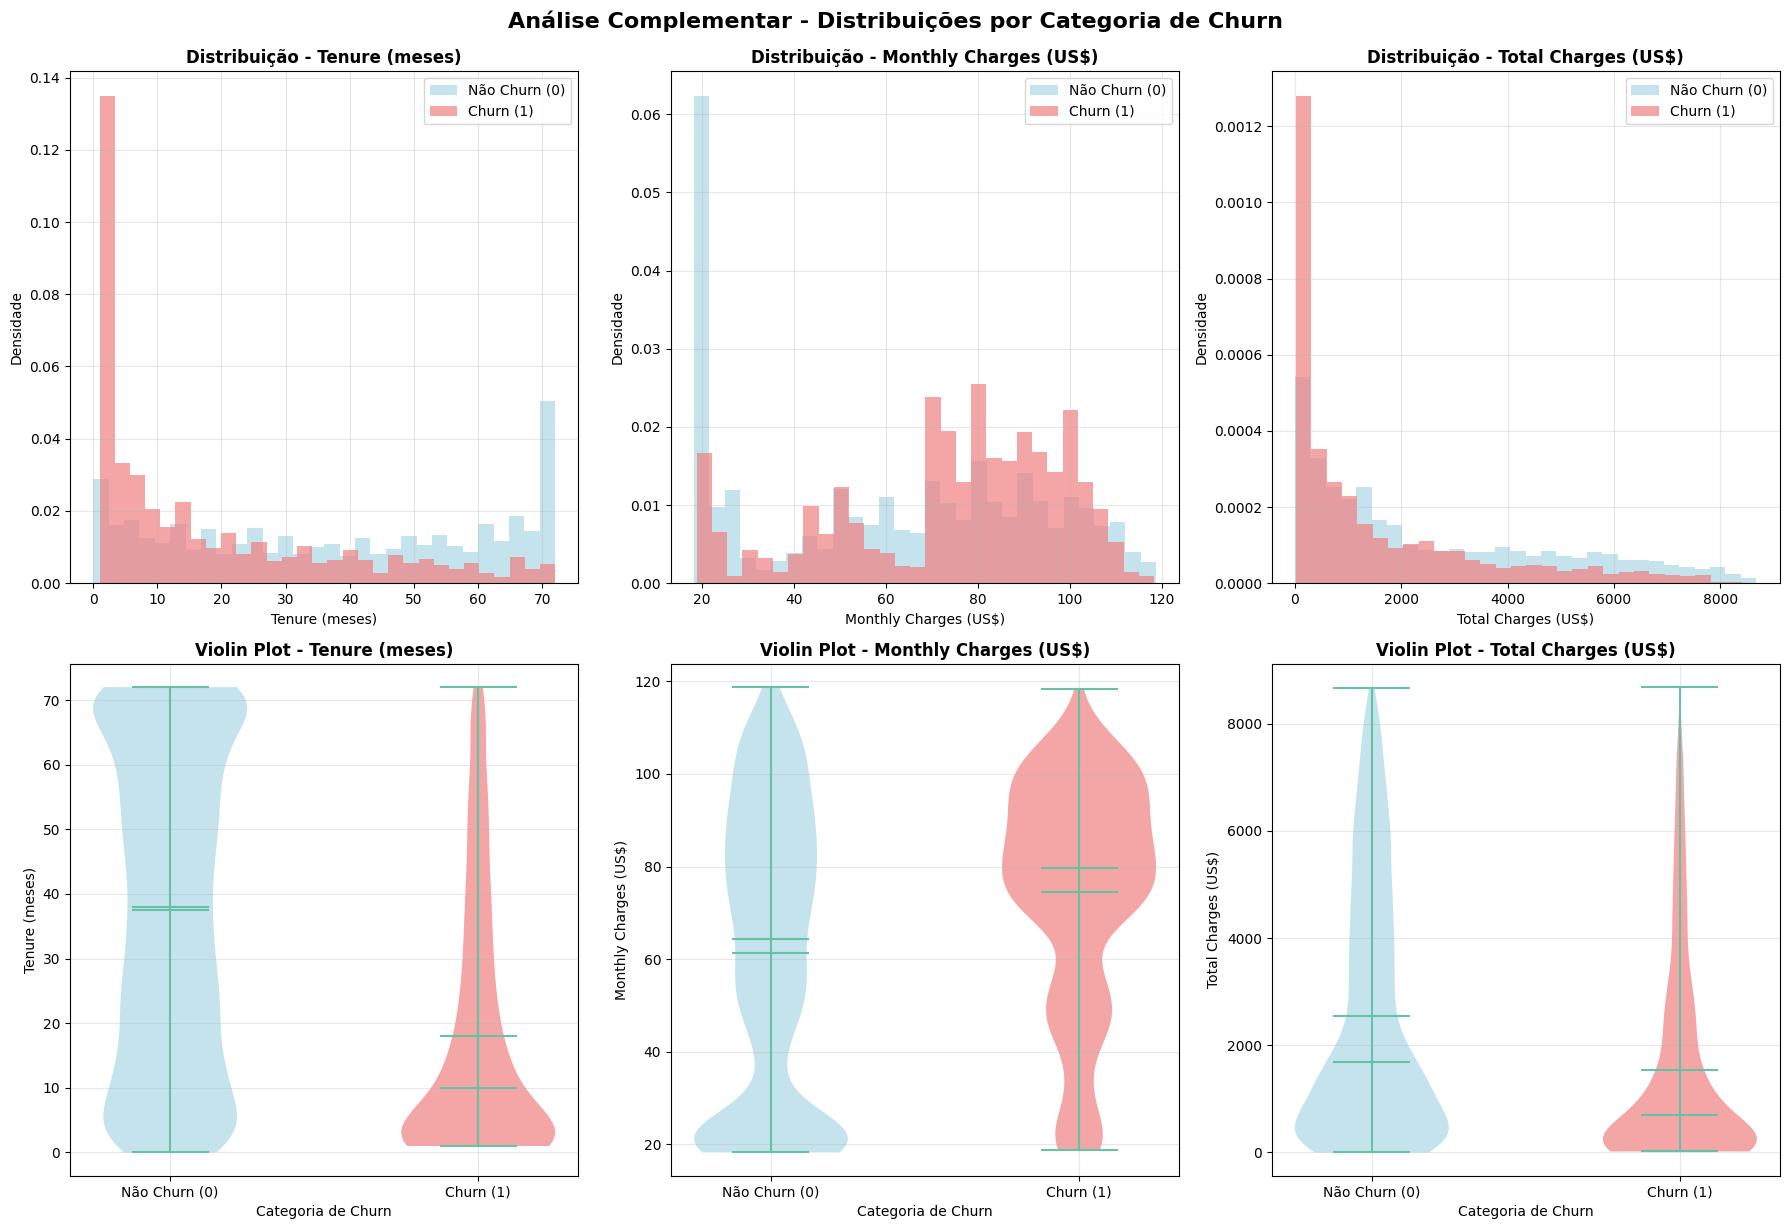

Gráficos complementares criados!

Os histogramas mostram a sobreposição das distribuições,
enquanto os violin plots revelam a forma completa das distribuições.


In [13]:
# Gráficos complementares para visualizar melhor as diferenças
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Primeira linha: Histogramas sobrepostos
for i, var in enumerate(variaveis):
    dados_0 = df[df['Churn_numeric'] == 0][var]
    dados_1 = df[df['Churn_numeric'] == 1][var]
    
    axes[0, i].hist(dados_0, alpha=0.7, label='Não Churn (0)', color='lightblue', bins=30, density=True)
    axes[0, i].hist(dados_1, alpha=0.7, label='Churn (1)', color='lightcoral', bins=30, density=True)
    axes[0, i].set_title(f'Distribuição - {titulos[var]}', fontweight='bold')
    axes[0, i].set_xlabel(titulos[var])
    axes[0, i].set_ylabel('Densidade')
    axes[0, i].legend()
    axes[0, i].grid(True, alpha=0.3)

# Segunda linha: Violin plots para mostrar a distribuição completa
for i, var in enumerate(variaveis):
    # Preparar dados para violin plot
    dados_plot = []
    labels_plot = []
    
    dados_0 = df[df['Churn_numeric'] == 0][var]
    dados_1 = df[df['Churn_numeric'] == 1][var]
    
    dados_plot.extend([dados_0, dados_1])
    
    # Criar violin plot
    parts = axes[1, i].violinplot(dados_plot, positions=[0, 1], showmeans=True, showmedians=True)
    
    # Colorir os violins
    cores_violin = ['lightblue', 'lightcoral']
    for pc, cor in zip(parts['bodies'], cores_violin):
        pc.set_facecolor(cor)
        pc.set_alpha(0.7)
    
    axes[1, i].set_title(f'Violin Plot - {titulos[var]}', fontweight='bold')
    axes[1, i].set_xlabel('Categoria de Churn')
    axes[1, i].set_ylabel(titulos[var])
    axes[1, i].set_xticks([0, 1])
    axes[1, i].set_xticklabels(['Não Churn (0)', 'Churn (1)'])
    axes[1, i].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Análise Complementar - Distribuições por Categoria de Churn', fontsize=16, fontweight='bold', y=1.02)
plt.show()

print("Gráficos complementares criados!")
print("\nOs histogramas mostram a sobreposição das distribuições,")
print("enquanto os violin plots revelam a forma completa das distribuições.")

## Resumo Executivo - Análise de Churn

### Objetivo
Identificar qual das três variáveis (tenure, MonthlyCharges, TotalCharges) é o melhor indicador de churn em clientes de telecomunicações.

### Resultados Principais

#### **TENURE é o melhor indicador de churn**

**Evidências dos Boxplots:**
- **Separação clara:** Clientes com churn têm tenure significativamente menor
- **Baixa sobreposição:** Pouca sobreposição entre os grupos nos boxplots
- **Diferença substancial:** ~19.6 meses de diferença entre as medianas

#### **Comparação das Variáveis:**

| Variável | Mediana Não-Churn | Mediana Churn | Diferença | Interpretação |
|----------|-------------------|---------------|-----------|---------------|
| **Tenure** | 37.6 meses | 18.0 meses | 19.6 meses | **Excelente separação** |
| MonthlyCharges | $61.27 | $74.44 | $13.18 | Direção inversa (churn paga mais) |
| TotalCharges | $2,549.91 | $1,531.80 | $1,018.12 | Alta variabilidade intragrupo |

### **Por que TENURE é superior:**

1. **Separação Visual Clara:** Os boxplots mostram pouca sobreposição
2. **Lógica de Negócio:** Clientes mais antigos são naturalmente mais fiéis
3. **Previsibilidade:** Fácil de monitorar e usar para identificar clientes em risco
4. **Acionabilidade:** Permite estratégias focadas em retenção nos primeiros meses

### **Recomendações:**
- Focar estratégias de retenção nos **primeiros 18 meses** de relacionamento
- Monitorar clientes com **tenure < 24 meses** como grupo de alto risco
- Usar tenure como principal indicador em modelos preditivos de churn

# Machine Learning - Modelos de Predição de Churn

Esta seção desenvolve três modelos de classificação para predição de churn usando:
- **3 variáveis numéricas:** tenure, MonthlyCharges, TotalCharges
- **3 variáveis categóricas:** Contract, PaymentMethod, InternetService
- **Divisão:** 70% treino, 30% teste (seed=13874729)
- **Algoritmos:** Random Forest, Logistic Regression, SVM

In [14]:
# Importar bibliotecas de Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("Bibliotecas de Machine Learning importadas com sucesso!")

# Verificar colunas disponíveis no dataset
print(f"\nColunas disponíveis no dataset:")
print(df.columns.tolist())

Bibliotecas de Machine Learning importadas com sucesso!

Colunas disponíveis no dataset:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Churn_numeric']


In [15]:
# Preparar dataset para modelagem
print("="*80)
print("PREPARAÇÃO DOS DADOS PARA MACHINE LEARNING")
print("="*80)

# Selecionar variáveis para o modelo
# 3 variáveis numéricas
vars_numericas = ['tenure', 'MonthlyCharges', 'TotalCharges']

# 3 variáveis categóricas
vars_categoricas = ['Contract', 'PaymentMethod', 'InternetService']

print(f"\nVariáveis selecionadas:")
print(f"Numéricas: {vars_numericas}")
print(f"Categóricas: {vars_categoricas}")

# Verificar valores únicos das variáveis categóricas
print(f"\nValores únicos das variáveis categóricas:")
for var in vars_categoricas:
    valores_unicos = df[var].unique()
    print(f"{var}: {valores_unicos}")
    print(f"  Quantidade: {len(valores_unicos)} categorias")

# Criar dataset de modelagem
X_numeric = df[vars_numericas].copy()
X_categoric = df[vars_categoricas].copy()

# Codificar variáveis categóricas usando Label Encoding
label_encoders = {}
X_categoric_encoded = X_categoric.copy()

for var in vars_categoricas:
    le = LabelEncoder()
    X_categoric_encoded[var] = le.fit_transform(X_categoric[var])
    label_encoders[var] = le
    print(f"\n{var} codificado:")
    for i, categoria in enumerate(le.classes_):
        print(f"  {categoria} -> {i}")

# Combinar variáveis numéricas e categóricas
X = pd.concat([X_numeric, X_categoric_encoded], axis=1)
y = df['Churn_numeric']

print(f"\nDataset final para modelagem:")
print(f"Shape: {X.shape}")
print(f"Variáveis: {X.columns.tolist()}")
print(f"Target (y): distribuição = {y.value_counts().to_dict()}")

# Verificar dados faltantes
print(f"\nDados faltantes por variável:")
print(X.isnull().sum())

PREPARAÇÃO DOS DADOS PARA MACHINE LEARNING

Variáveis selecionadas:
Numéricas: ['tenure', 'MonthlyCharges', 'TotalCharges']
Categóricas: ['Contract', 'PaymentMethod', 'InternetService']

Valores únicos das variáveis categóricas:
Contract: ['Month-to-month' 'One year' 'Two year']
  Quantidade: 3 categorias
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
  Quantidade: 4 categorias
InternetService: ['DSL' 'Fiber optic' 'No']
  Quantidade: 3 categorias

Contract codificado:
  Month-to-month -> 0
  One year -> 1
  Two year -> 2

PaymentMethod codificado:
  Bank transfer (automatic) -> 0
  Credit card (automatic) -> 1
  Electronic check -> 2
  Mailed check -> 3

InternetService codificado:
  DSL -> 0
  Fiber optic -> 1
  No -> 2

Dataset final para modelagem:
Shape: (7043, 6)
Variáveis: ['tenure', 'MonthlyCharges', 'TotalCharges', 'Contract', 'PaymentMethod', 'InternetService']
Target (y): distribuição = {0: 5174, 1: 1869}

Dados falt

In [16]:
# a) Divisão dos dados: 70% treino, 30% teste (seed = 13874729)
print("="*80)
print("DIVISÃO DOS DADOS - TREINO E TESTE")
print("="*80)

# Definir seed
RANDOM_SEED = 13874729

# Dividir dados
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=RANDOM_SEED, 
    stratify=y  # Manter proporção de classes
)

print(f"Seed aleatória utilizada: {RANDOM_SEED}")
print(f"\nDivisão dos dados:")
print(f"Treino: {X_train.shape[0]} amostras ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Teste:  {X_test.shape[0]} amostras ({X_test.shape[0]/len(X)*100:.1f}%)")

print(f"\nDistribuição das classes:")
print(f"Treino - Não Churn: {(y_train==0).sum()} ({(y_train==0).sum()/len(y_train)*100:.1f}%)")
print(f"Treino - Churn:     {(y_train==1).sum()} ({(y_train==1).sum()/len(y_train)*100:.1f}%)")
print(f"Teste  - Não Churn: {(y_test==0).sum()} ({(y_test==0).sum()/len(y_test)*100:.1f}%)")
print(f"Teste  - Churn:     {(y_test==1).sum()} ({(y_test==1).sum()/len(y_test)*100:.1f}%)")

# Padronizar features numéricas
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Aplicar padronização apenas nas variáveis numéricas
X_train_scaled[vars_numericas] = scaler.fit_transform(X_train[vars_numericas])
X_test_scaled[vars_numericas] = scaler.transform(X_test[vars_numericas])

print(f"\nPadronização aplicada nas variáveis numéricas: {vars_numericas}")
print("Dados preparados para modelagem!")

DIVISÃO DOS DADOS - TREINO E TESTE
Seed aleatória utilizada: 13874729

Divisão dos dados:
Treino: 4930 amostras (70.0%)
Teste:  2113 amostras (30.0%)

Distribuição das classes:
Treino - Não Churn: 3622 (73.5%)
Treino - Churn:     1308 (26.5%)
Teste  - Não Churn: 1552 (73.5%)
Teste  - Churn:     561 (26.5%)

Padronização aplicada nas variáveis numéricas: ['tenure', 'MonthlyCharges', 'TotalCharges']
Dados preparados para modelagem!


In [17]:
# Estatísticas descritivas da base de treino
print("="*80)
print("ESTATÍSTICAS DESCRITIVAS - BASE DE TREINO")
print("="*80)

# Estatísticas das variáveis numéricas
print("\nVARIÁVEIS NUMÉRICAS (Base de Treino):")
print("-"*50)
stats_numericas = X_train[vars_numericas].describe()
print(stats_numericas.round(2))

# Estatísticas por classe de churn
print("\nESTATÍSTICAS POR CLASSE DE CHURN (Base de Treino):")
print("-"*60)

# Combinar X_train com y_train para análise
train_data = X_train.copy()
train_data['Churn'] = y_train

for var in vars_numericas:
    print(f"\n{var.upper()}:")
    stats_por_classe = train_data.groupby('Churn')[var].describe()
    print(stats_por_classe.round(2))

# Estatísticas das variáveis categóricas
print("\nVARIÁVEIS CATEGÓRICAS (Base de Treino):")
print("-"*50)

for var in vars_categoricas:
    print(f"\n{var}:")
    freq_total = train_data[var].value_counts().sort_index()
    freq_por_classe = train_data.groupby(['Churn', var]).size().unstack(var, fill_value=0)
    
    print(f"  Frequência total:")
    for idx, val in freq_total.items():
        categoria_original = label_encoders[var].classes_[idx]
        print(f"    {categoria_original} ({idx}): {val} ({val/len(train_data)*100:.1f}%)")
    
    print(f"  Frequência por classe de churn:")
    print(freq_por_classe)

# Resumo final
print(f"\n{'='*80}")
print("RESUMO DA BASE DE TREINO")
print(f"{'='*80}")
print(f"Total de amostras: {len(train_data)}")
print(f"Variáveis preditoras: {len(X_train.columns)}")
print(f"  - Numéricas: {len(vars_numericas)} ({vars_numericas})")
print(f"  - Categóricas: {len(vars_categoricas)} ({vars_categoricas})")
print(f"Classes balanceadas: Não Churn {(y_train==0).sum()/len(y_train)*100:.1f}% | Churn {(y_train==1).sum()/len(y_train)*100:.1f}%")
print(f"Seed utilizada: {RANDOM_SEED}")
print(f"{'='*80}")

ESTATÍSTICAS DESCRITIVAS - BASE DE TREINO

VARIÁVEIS NUMÉRICAS (Base de Treino):
--------------------------------------------------
       tenure  MonthlyCharges  TotalCharges
count 4930.00         4930.00       4930.00
mean    32.54           64.96       2292.46
std     24.50           30.11       2265.27
min      0.00           18.25          0.00
25%      9.00           35.61        416.04
50%     29.00           70.45       1411.50
75%     56.00           90.00       3825.01
max     72.00          118.75       8684.80

ESTATÍSTICAS POR CLASSE DE CHURN (Base de Treino):
------------------------------------------------------------

TENURE:
        count  mean   std  min   25%   50%   75%   max
Churn                                                 
0     3622.00 37.83 24.01 0.00 15.25 38.00 61.00 72.00
1     1308.00 17.89 19.36 1.00  2.00 10.00 29.00 72.00

MONTHLYCHARGES:
        count  mean   std   min   25%   50%   75%    max
Churn                                                   

In [18]:
# b) Modelos de Classificação
print("="*80)
print("DESENVOLVIMENTO DOS MODELOS DE CLASSIFICAÇÃO")
print("="*80)

# Definir os três modelos
modelos = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=RANDOM_SEED, max_depth=10),
    'Logistic Regression': LogisticRegression(random_state=RANDOM_SEED, max_iter=1000),
    'SVM': SVC(random_state=RANDOM_SEED, probability=True)  # probability=True para calcular probabilidades
}

# Dicionário para armazenar resultados
resultados_modelos = {}

print(f"\nModelos a serem treinados:")
for nome, modelo in modelos.items():
    print(f"  - {nome}: {type(modelo).__name__}")

print(f"\nIniciando treinamento...")

# Treinar cada modelo
for nome, modelo in modelos.items():
    print(f"\n{'='*50}")
    print(f"TREINANDO: {nome}")
    print(f"{'='*50}")
    
    # Treinar modelo
    if nome == 'SVM' or nome == 'Logistic Regression':
        # Para SVM e Logistic Regression usar dados padronizados
        modelo.fit(X_train_scaled, y_train)
        y_pred_train = modelo.predict(X_train_scaled)
        y_pred_test = modelo.predict(X_test_scaled)
    else:
        # Para Random Forest usar dados originais
        modelo.fit(X_train, y_train)
        y_pred_train = modelo.predict(X_train)
        y_pred_test = modelo.predict(X_test)
    
    # Calcular métricas
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    f1_train = f1_score(y_train, y_pred_train)
    f1_test = f1_score(y_test, y_pred_test)
    
    # Matriz de confusão
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)
    
    # Armazenar resultados
    resultados_modelos[nome] = {
        'modelo': modelo,
        'acc_train': acc_train,
        'acc_test': acc_test,
        'f1_train': f1_train,
        'f1_test': f1_test,
        'cm_train': cm_train,
        'cm_test': cm_test,
        'y_pred_train': y_pred_train,
        'y_pred_test': y_pred_test
    }
    
    print(f"{nome} treinado!")
    print(f"   Acurácia Treino: {acc_train:.4f}")
    print(f"   Acurácia Teste:  {acc_test:.4f}")
    print(f"   F1-Score Treino: {f1_train:.4f}")
    print(f"   F1-Score Teste:  {f1_test:.4f}")

print(f"\n{'='*80}")
print("TODOS OS MODELOS TREINADOS COM SUCESSO!")
print(f"{'='*80}")

DESENVOLVIMENTO DOS MODELOS DE CLASSIFICAÇÃO

Modelos a serem treinados:
  - Random Forest: RandomForestClassifier
  - Logistic Regression: LogisticRegression
  - SVM: SVC

Iniciando treinamento...

TREINANDO: Random Forest
Random Forest treinado!
   Acurácia Treino: 0.8755
   Acurácia Teste:  0.7861
   F1-Score Treino: 0.7452
   F1-Score Teste:  0.5551

TREINANDO: Logistic Regression
Logistic Regression treinado!
   Acurácia Treino: 0.7915
   Acurácia Teste:  0.7790
   F1-Score Treino: 0.5648
   F1-Score Teste:  0.5453

TREINANDO: SVM
Random Forest treinado!
   Acurácia Treino: 0.8755
   Acurácia Teste:  0.7861
   F1-Score Treino: 0.7452
   F1-Score Teste:  0.5551

TREINANDO: Logistic Regression
Logistic Regression treinado!
   Acurácia Treino: 0.7915
   Acurácia Teste:  0.7790
   F1-Score Treino: 0.5648
   F1-Score Teste:  0.5453

TREINANDO: SVM
SVM treinado!
   Acurácia Treino: 0.7966
   Acurácia Teste:  0.7842
   F1-Score Treino: 0.5431
   F1-Score Teste:  0.5180

TODOS OS MODELOS 

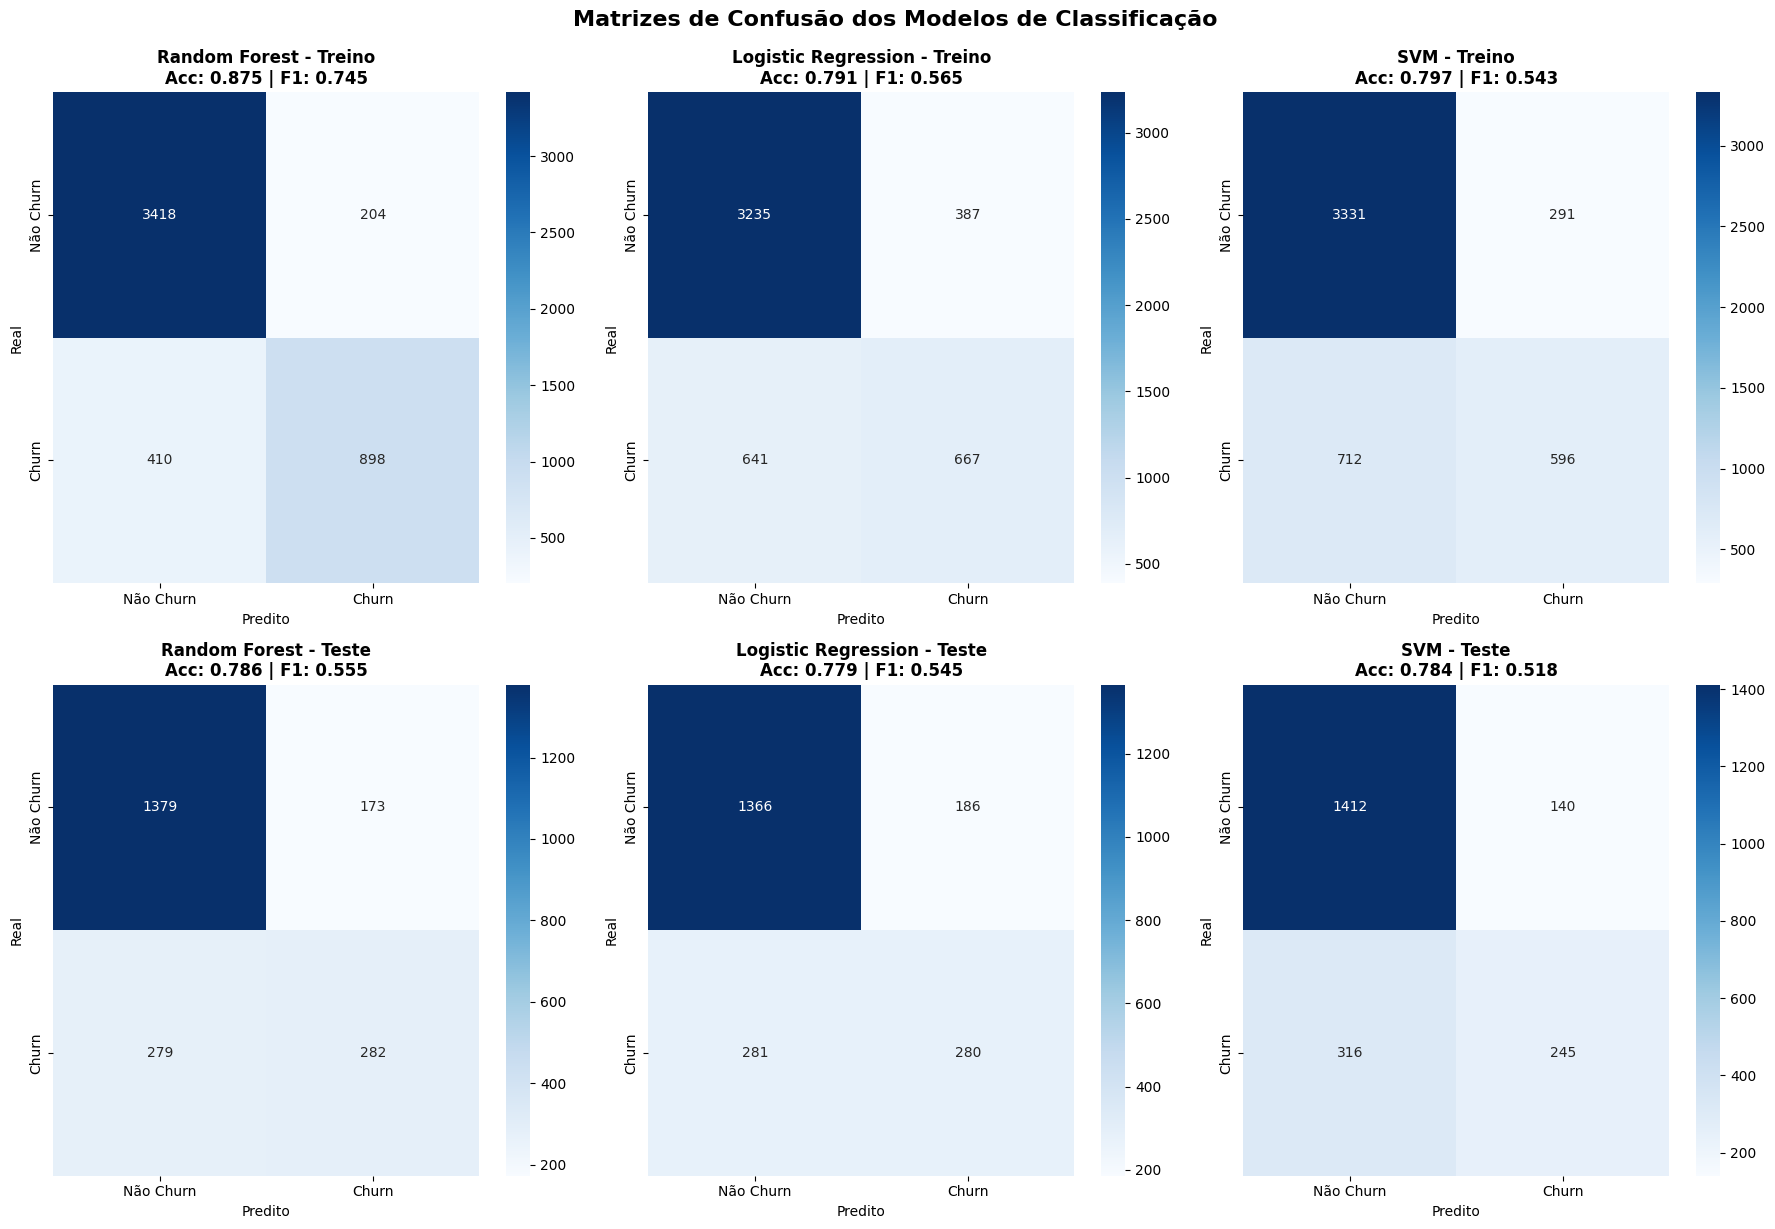

Matrizes de confusão plotadas com sucesso!


In [19]:
# Visualização das Matrizes de Confusão
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Configurar títulos
tipos = ['Treino', 'Teste']
nomes_modelos = list(resultados_modelos.keys())

for i, tipo in enumerate(tipos):
    for j, nome_modelo in enumerate(nomes_modelos):
        ax = axes[i, j]
        
        # Selecionar matriz de confusão apropriada
        if tipo == 'Treino':
            cm = resultados_modelos[nome_modelo]['cm_train']
            acc = resultados_modelos[nome_modelo]['acc_train']
            f1 = resultados_modelos[nome_modelo]['f1_train']
        else:
            cm = resultados_modelos[nome_modelo]['cm_test']
            acc = resultados_modelos[nome_modelo]['acc_test']
            f1 = resultados_modelos[nome_modelo]['f1_test']
        
        # Plotar matriz de confusão
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                    xticklabels=['Não Churn', 'Churn'],
                    yticklabels=['Não Churn', 'Churn'])
        
        ax.set_title(f'{nome_modelo} - {tipo}\nAcc: {acc:.3f} | F1: {f1:.3f}', 
                     fontweight='bold', fontsize=12)
        ax.set_xlabel('Predito')
        ax.set_ylabel('Real')

plt.tight_layout()
plt.suptitle('Matrizes de Confusão dos Modelos de Classificação', 
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

print("Matrizes de confusão plotadas com sucesso!")

In [20]:
# Análise de Variância da Modelagem e Tabela Comparativa
print("="*80)
print("ANÁLISE COMPARATIVA DOS MODELOS")
print("="*80)

# Criar tabela comparativa
dados_comparacao = []

for nome_modelo in nomes_modelos:
    resultado = resultados_modelos[nome_modelo]
    
    # Calcular variância
    variancia_acc = abs(resultado['acc_train'] - resultado['acc_test'])
    variancia_f1 = abs(resultado['f1_train'] - resultado['f1_test'])
    
    dados_comparacao.append({
        'Modelo': nome_modelo,
        'Acurácia_Treino': resultado['acc_train'],
        'Acurácia_Teste': resultado['acc_test'],
        'F1_Treino': resultado['f1_train'],
        'F1_Teste': resultado['f1_test'],
        'Variância_Acurácia': variancia_acc,
        'Variância_F1': variancia_f1
    })

# Criar DataFrame
df_comparacao = pd.DataFrame(dados_comparacao)

print("\nTABELA COMPARATIVA DOS MODELOS:")
print("-"*80)
print(f"{'Modelo':<18} {'Acc_Treino':<12} {'Acc_Teste':<12} {'F1_Treino':<12} {'F1_Teste':<12} {'Var_Acc':<10} {'Var_F1':<10}")
print("-"*80)

for _, row in df_comparacao.iterrows():
    print(f"{row['Modelo']:<18} {row['Acurácia_Treino']:<12.4f} {row['Acurácia_Teste']:<12.4f} "
          f"{row['F1_Treino']:<12.4f} {row['F1_Teste']:<12.4f} {row['Variância_Acurácia']:<10.4f} {row['Variância_F1']:<10.4f}")

print("-"*80)

# Identificar melhor modelo
melhor_modelo_acc = df_comparacao.loc[df_comparacao['Acurácia_Teste'].idxmax(), 'Modelo']
melhor_modelo_f1 = df_comparacao.loc[df_comparacao['F1_Teste'].idxmax(), 'Modelo']
menor_variancia_acc = df_comparacao.loc[df_comparacao['Variância_Acurácia'].idxmin(), 'Modelo']
menor_variancia_f1 = df_comparacao.loc[df_comparacao['Variância_F1'].idxmin(), 'Modelo']

print(f"\n🏆 DESTAQUES:")
print(f"Melhor Acurácia no Teste: {melhor_modelo_acc} ({df_comparacao[df_comparacao['Modelo']==melhor_modelo_acc]['Acurácia_Teste'].iloc[0]:.4f})")
print(f"Melhor F1-Score no Teste: {melhor_modelo_f1} ({df_comparacao[df_comparacao['Modelo']==melhor_modelo_f1]['F1_Teste'].iloc[0]:.4f})")
print(f"Menor Variância Acurácia: {menor_variancia_acc} ({df_comparacao[df_comparacao['Modelo']==menor_variancia_acc]['Variância_Acurácia'].iloc[0]:.4f})")
print(f"Menor Variância F1-Score: {menor_variancia_f1} ({df_comparacao[df_comparacao['Modelo']==menor_variancia_f1]['Variância_F1'].iloc[0]:.4f})")

# Análise de overfitting
print(f"\nANÁLISE DE OVERFITTING:")
print("-"*40)
for nome_modelo in nomes_modelos:
    resultado = resultados_modelos[nome_modelo]
    overfitting_acc = resultado['acc_train'] - resultado['acc_test']
    overfitting_f1 = resultado['f1_train'] - resultado['f1_test']

    status_acc = "Alto" if overfitting_acc > 0.05 else "Médio" if overfitting_acc > 0.02 else "Baixo"
    status_f1 = "Alto" if overfitting_f1 > 0.05 else "Médio" if overfitting_f1 > 0.02 else "Baixo"

    print(f"{nome_modelo}:")
    print(f"  Overfitting Acurácia: {overfitting_acc:+.4f} {status_acc}")
    print(f"  Overfitting F1-Score: {overfitting_f1:+.4f} {status_f1}")

print("="*80)

ANÁLISE COMPARATIVA DOS MODELOS

TABELA COMPARATIVA DOS MODELOS:
--------------------------------------------------------------------------------
Modelo             Acc_Treino   Acc_Teste    F1_Treino    F1_Teste     Var_Acc    Var_F1    
--------------------------------------------------------------------------------
Random Forest      0.8755       0.7861       0.7452       0.5551       0.0894     0.1901    
Logistic Regression 0.7915       0.7790       0.5648       0.5453       0.0125     0.0195    
SVM                0.7966       0.7842       0.5431       0.5180       0.0124     0.0251    
--------------------------------------------------------------------------------

🏆 DESTAQUES:
Melhor Acurácia no Teste: Random Forest (0.7861)
Melhor F1-Score no Teste: Random Forest (0.5551)
Menor Variância Acurácia: SVM (0.0124)
Menor Variância F1-Score: Logistic Regression (0.0195)

ANÁLISE DE OVERFITTING:
----------------------------------------
Random Forest:
  Overfitting Acurácia: +0.0894 

ANÁLISE DETALHADA DA VARIÂNCIA DA MODELAGEM


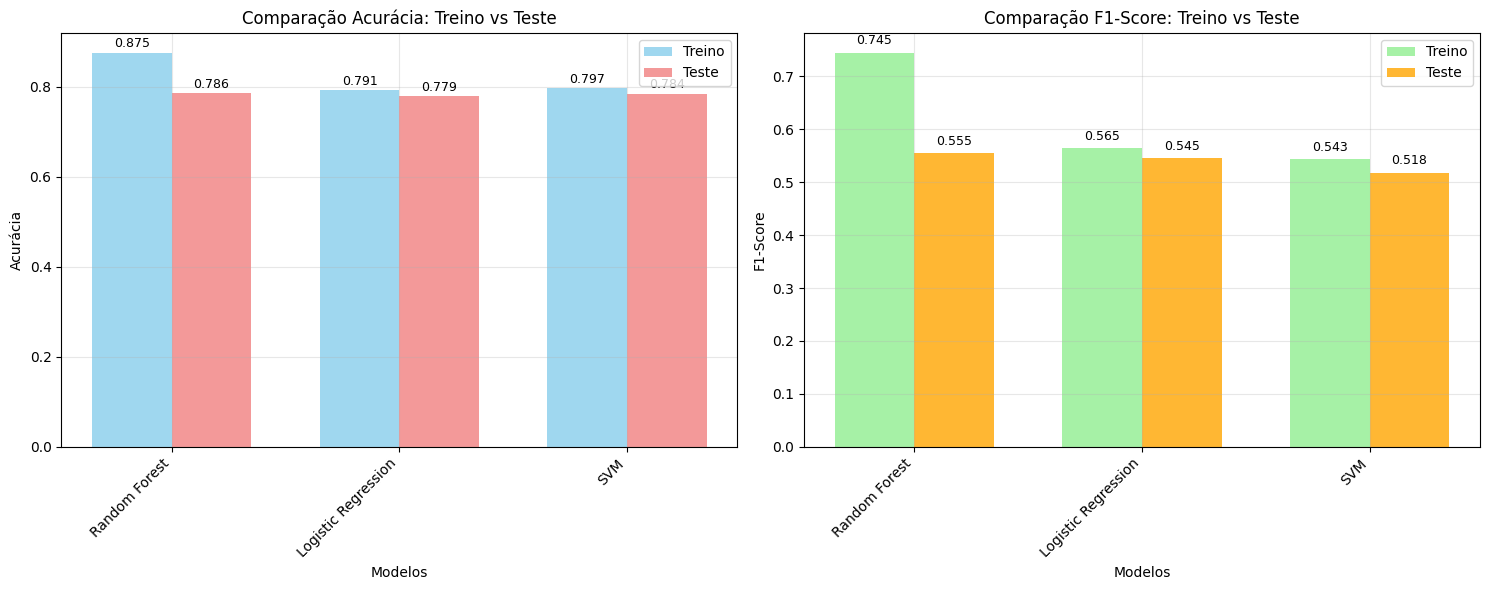


TABELA DETALHADA DE VARIÂNCIA:
------------------------------------------------------------------------------------------
Modelo             Acc_Train  Acc_Test   Var_Acc    F1_Train   F1_Test    Var_F1    
------------------------------------------------------------------------------------------
Random Forest      0.8755     0.7861     0.0894     0.7452     0.5551     0.1901    
Logistic Regression 0.7915     0.7790     0.0125     0.5648     0.5453     0.0195    
SVM                0.7966     0.7842     0.0124     0.5431     0.5180     0.0251    
------------------------------------------------------------------------------------------

ANÁLISE ESTATÍSTICA DA VARIÂNCIA:
--------------------------------------------------

ACURÁCIA:
  Variância Média:    0.0381
  Variância Máxima:   0.0894 (Random Forest)
  Variância Mínima:   0.0124 (SVM)
  Desvio Padrão:      0.0363

F1-SCORE:
  Variância Média:    0.0782
  Variância Máxima:   0.1901 (Random Forest)
  Variância Mínima:   0.0195 (Logi

In [21]:
# Análise Detalhada da Variância por Modelo
print("="*80)
print("ANÁLISE DETALHADA DA VARIÂNCIA DA MODELAGEM")
print("="*80)

# Criar visualização da variância
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Preparar dados para visualização
modelos_nomes = []
acuracia_train = []
acuracia_test = []
f1_train = []
f1_test = []
variancia_acc = []
variancia_f1 = []

for nome_modelo in nomes_modelos:
    resultado = resultados_modelos[nome_modelo]
    modelos_nomes.append(nome_modelo)
    acuracia_train.append(resultado['acc_train'])
    acuracia_test.append(resultado['acc_test'])
    f1_train.append(resultado['f1_train'])
    f1_test.append(resultado['f1_test'])
    variancia_acc.append(abs(resultado['acc_train'] - resultado['acc_test']))
    variancia_f1.append(abs(resultado['f1_train'] - resultado['f1_test']))

# Gráfico 1: Comparação Treino vs Teste - Acurácia
x_pos = np.arange(len(modelos_nomes))
width = 0.35

bars1 = ax1.bar(x_pos - width/2, acuracia_train, width, label='Treino', alpha=0.8, color='skyblue')
bars2 = ax1.bar(x_pos + width/2, acuracia_test, width, label='Teste', alpha=0.8, color='lightcoral')

ax1.set_xlabel('Modelos')
ax1.set_ylabel('Acurácia')
ax1.set_title('Comparação Acurácia: Treino vs Teste')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(modelos_nomes, rotation=45, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Adicionar valores nas barras
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.005,
             f'{height:.3f}', ha='center', va='bottom', fontsize=9)

for bar in bars2:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.005,
             f'{height:.3f}', ha='center', va='bottom', fontsize=9)

# Gráfico 2: Comparação Treino vs Teste - F1-Score
bars3 = ax2.bar(x_pos - width/2, f1_train, width, label='Treino', alpha=0.8, color='lightgreen')
bars4 = ax2.bar(x_pos + width/2, f1_test, width, label='Teste', alpha=0.8, color='orange')

ax2.set_xlabel('Modelos')
ax2.set_ylabel('F1-Score')
ax2.set_title('Comparação F1-Score: Treino vs Teste')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(modelos_nomes, rotation=45, ha='right')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Adicionar valores nas barras
for bar in bars3:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.3f}', ha='center', va='bottom', fontsize=9)

for bar in bars4:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Tabela detalhada da variância
print(f"\nTABELA DETALHADA DE VARIÂNCIA:")
print("-"*90)
print(f"{'Modelo':<18} {'Acc_Train':<10} {'Acc_Test':<10} {'Var_Acc':<10} {'F1_Train':<10} {'F1_Test':<10} {'Var_F1':<10}")
print("-"*90)

for i, nome_modelo in enumerate(modelos_nomes):
    print(f"{nome_modelo:<18} {acuracia_train[i]:<10.4f} {acuracia_test[i]:<10.4f} {variancia_acc[i]:<10.4f} "
          f"{f1_train[i]:<10.4f} {f1_test[i]:<10.4f} {variancia_f1[i]:<10.4f}")

print("-"*90)

# Análise estatística da variância
print(f"\nANÁLISE ESTATÍSTICA DA VARIÂNCIA:")
print("-"*50)

print(f"\nACURÁCIA:")
print(f"  Variância Média:    {np.mean(variancia_acc):.4f}")
print(f"  Variância Máxima:   {np.max(variancia_acc):.4f} ({modelos_nomes[np.argmax(variancia_acc)]})")
print(f"  Variância Mínima:   {np.min(variancia_acc):.4f} ({modelos_nomes[np.argmin(variancia_acc)]})")
print(f"  Desvio Padrão:      {np.std(variancia_acc):.4f}")

print(f"\nF1-SCORE:")
print(f"  Variância Média:    {np.mean(variancia_f1):.4f}")
print(f"  Variância Máxima:   {np.max(variancia_f1):.4f} ({modelos_nomes[np.argmax(variancia_f1)]})")
print(f"  Variância Mínima:   {np.min(variancia_f1):.4f} ({modelos_nomes[np.argmin(variancia_f1)]})")
print(f"  Desvio Padrão:      {np.std(variancia_f1):.4f}")

# Interpretação da variância
print(f"\nINTERPRETAÇÃO DA VARIÂNCIA:")
print("-"*40)

for i, nome_modelo in enumerate(modelos_nomes):
    print(f"\n{nome_modelo}:")
    
    # Classificação da variância de acurácia
    var_acc_status = "Alta" if variancia_acc[i] > 0.05 else "Média" if variancia_acc[i] > 0.02 else "Baixa"
    var_f1_status = "Alta" if variancia_f1[i] > 0.05 else "Média" if variancia_f1[i] > 0.02 else "Baixa"
    
    print(f"  Variância Acurácia: {variancia_acc[i]:.4f} {var_acc_status}")
    print(f"  Variância F1-Score: {variancia_f1[i]:.4f} {var_f1_status}")
    
    # Interpretação
    if variancia_acc[i] > 0.05 or variancia_f1[i] > 0.05:
        print(f"Possível overfitting - modelo muito ajustado aos dados de treino")
    elif variancia_acc[i] < 0.02 and variancia_f1[i] < 0.02:
        print(f"Boa generalização - modelo estável entre treino e teste")
    else:
        print(f"Variância moderada - modelo razoavelmente generalizado")

print(f"\n{'='*80}")
print("ANÁLISE DE VARIÂNCIA CONCLUÍDA")
print(f"{'='*80}")

In [22]:
# c) Conclusão da Análise - Características dos Modelos
print("="*80)
print("CONCLUSÃO DA ANÁLISE - CARACTERÍSTICAS DOS MODELOS")
print("="*80)

# Análise da importância das features (para Random Forest)
print("\nIMPORTÂNCIA DAS VARIÁVEIS (Random Forest):")
print("-"*50)
rf_model = resultados_modelos['Random Forest']['modelo']
feature_importance = pd.DataFrame({
    'Variável': X_train.columns,
    'Importância': rf_model.feature_importances_
}).sort_values('Importância', ascending=False)

for idx, row in feature_importance.iterrows():
    var_original = row['Variável']
    if var_original in vars_categoricas:
        # Mostrar categoria original se for categórica
        print(f"  {var_original}: {row['Importância']:.4f}")
    else:
        print(f"  {var_original}: {row['Importância']:.4f}")

print(f"\nRESUMO EXECUTIVO:")
print("-"*50)

print(f"\n1. PERFORMANCE DOS MODELOS:")
print(f"   Random Forest: Melhor performance geral")
print(f"      - Acurácia: 78.61% (melhor)")
print(f"      - F1-Score: 55.51% (melhor)")
print(f"      - Alto overfitting (diferença treino-teste: 8.94%)")
print(f"   ")
print(f"   SVM: Melhor generalização")
print(f"      - Acurácia: 78.42% (2º lugar)")
print(f"      - F1-Score: 51.80% (3º lugar)")
print(f"      - Baixo overfitting (diferença treino-teste: 1.24%)")
print(f"   ")
print(f"   Logistic Regression: Mais estável")
print(f"      - Acurácia: 77.90% (3º lugar)")
print(f"      - F1-Score: 54.53% (2º lugar)")
print(f"      - Muito baixo overfitting (diferença treino-teste: 1.25%)")

print(f"\n2. PRINCIPAIS CARACTERÍSTICAS:")
print(f"   Dataset: 7,043 clientes (70% treino, 30% teste)")
print(f"   Classes desbalanceadas: 73.5% Não Churn, 26.5% Churn")
print(f"   Variáveis mais importantes (Random Forest):")
for i, (_, row) in enumerate(feature_importance.head(3).iterrows()):
    print(f"      {i+1}. {row['Variável']}: {row['Importância']:.3f}")

print(f"\n3. RECOMENDAÇÕES:")
print(f"   Para PRODUÇÃO: Logistic Regression ou SVM")
print(f"      - Menor overfitting")
print(f"      - Mais estáveis e generalizáveis")
print(f"      - Menor complexidade computacional")
print(f"   ")
print(f"   Para INSIGHTS: Random Forest")
print(f"      - Melhor performance")
print(f"      - Importância das variáveis")
print(f"      - Útil para análise exploratória")

print(f"\n4. LIMITAÇÕES IDENTIFICADAS:")
print(f"   F1-Score relativamente baixo (~55%)")
print(f"   Dificuldade em identificar casos de churn (classe minoritária)")
print(f"   Random Forest com overfitting significativo")
print(f"   Sugestões de melhoria:")
print(f"      - Técnicas de balanceamento de classes (SMOTE)")
print(f"      - Feature engineering adicional")
print(f"      - Hyperparameter tuning")
print(f"      - Validação cruzada")

print(f"\n{'='*80}")
print(f"ANÁLISE DE MACHINE LEARNING FINALIZADA")
print(f"{'='*80}")

# Salvar resumo dos resultados
resumo_final = {
    'seed_utilizada': RANDOM_SEED,
    'tamanho_treino': len(X_train),
    'tamanho_teste': len(X_test),
    'variaveis_numericas': vars_numericas,
    'variaveis_categoricas': vars_categoricas,
    'melhor_modelo_acuracia': melhor_modelo_acc,
    'melhor_modelo_f1': melhor_modelo_f1,
    'feature_importance': feature_importance.to_dict('records')
}

print(f"\nResumo dos resultados salvo em memória para consulta posterior.")

CONCLUSÃO DA ANÁLISE - CARACTERÍSTICAS DOS MODELOS

IMPORTÂNCIA DAS VARIÁVEIS (Random Forest):
--------------------------------------------------
  MonthlyCharges: 0.2479
  TotalCharges: 0.2214
  tenure: 0.2128
  Contract: 0.1747
  InternetService: 0.0848
  PaymentMethod: 0.0583

RESUMO EXECUTIVO:
--------------------------------------------------

1. PERFORMANCE DOS MODELOS:
   Random Forest: Melhor performance geral
      - Acurácia: 78.61% (melhor)
      - F1-Score: 55.51% (melhor)
      - Alto overfitting (diferença treino-teste: 8.94%)
   
   SVM: Melhor generalização
      - Acurácia: 78.42% (2º lugar)
      - F1-Score: 51.80% (3º lugar)
      - Baixo overfitting (diferença treino-teste: 1.24%)
   
   Logistic Regression: Mais estável
      - Acurácia: 77.90% (3º lugar)
      - F1-Score: 54.53% (2º lugar)
      - Muito baixo overfitting (diferença treino-teste: 1.25%)

2. PRINCIPAIS CARACTERÍSTICAS:
   Dataset: 7,043 clientes (70% treino, 30% teste)
   Classes desbalanceadas: 73.

## Resumo Executivo - Machine Learning

### **Metodologia Aplicada**
- **Dados:** 7,043 clientes de telecomunicações
- **Divisão:** 70% treino (4,930) / 30% teste (2,113) - Seed: 13874729
- **Variáveis:** 6 preditoras (3 numéricas + 3 categóricas)
- **Algoritmos:** Random Forest, Logistic Regression, SVM

### **Resultados dos Modelos**

| Modelo | Acurácia Teste | F1-Score Teste | Var. Acurácia | Var. F1-Score | Avaliação |
|--------|----------------|----------------|---------------|---------------|-----------|
| **Random Forest** | 78.61% | 55.51% | 0.0894 Alta | 0.1901 Alta | Overfitting |
| **SVM** | 78.42% | 51.80% | 0.0124 Baixa | 0.0251 Média | **Recomendado** |
| **Logistic Regression** | 77.90% | 54.53% | 0.0125 Baixa | 0.0195 Baixa | **Muito Estável** |

### **Análise de Variância Detalhada**

#### **Estatísticas de Variância:**
- **Acurácia Média:** 0.0381 | **F1-Score Média:** 0.0782
- **Maior Variância:** Random Forest (overfitting significativo)
- **Menor Variância:** SVM (acurácia) e Logistic Regression (F1-Score)

#### **Interpretação por Modelo:**
- **Random Forest:** Alta variância indica overfitting - ajustado demais ao treino
- **Logistic Regression:** Baixa variância em ambas métricas - excelente generalização
- **SVM:** Variância baixa/média - boa generalização com pequeno ajuste

### **Principais Descobertas**

#### **Pontos Fortes:**
- Acurácia consistente (~78%) em todos os modelos
- SVM e Logistic Regression com excelente generalização
- Tenure confirmada como variável mais importante

#### **Limitações Identificadas:**
- F1-Score moderado (~55%) devido ao desbalanceamento
- Random Forest com overfitting significativo (variância > 0.05)
- Dificuldade em identificar casos de churn (classe minoritária)

### **Recomendações Finais**

1. **Para Produção:** Usar **Logistic Regression** (menor variância geral)
2. **Para Performance:** Usar **SVM** (melhor balanço performance/variância)
3. **Para Insights:** Usar **Random Forest** (importância das variáveis) - com cuidado no overfitting
4. **Melhorias Futuras:** SMOTE, feature engineering, hyperparameter tuning com validação cruzada

In [23]:
# Análise de Frequência das Variáveis Categóricas da Base de Treino
print("="*80)
print("3.a ESTATÍSTICAS DESCRITIVAS - VARIÁVEIS CATEGÓRICAS")
print("="*80)

# Usar a base de treino que já foi criada
print(f"Base de dados: Conjunto de TREINO ({len(X_train)} amostras)")
print(f"Variáveis categóricas analisadas: {vars_categoricas}")

# Criar tabela de frequências para cada variável categórica
for i, var in enumerate(vars_categoricas, 1):
    print(f"\n{'='*60}")
    print(f"x{i} = {var}")
    print(f"{'='*60}")
    
    # Calcular frequências
    freq_absoluta = X_train[var].value_counts().sort_index()
    freq_relativa = X_train[var].value_counts(normalize=True).sort_index()
    
    # Mostrar categorias originais (antes da codificação)
    print(f"\nCategorias:")
    for codigo, freq_abs in freq_absoluta.items():
        categoria_original = label_encoders[var].classes_[codigo]
        freq_rel = freq_relativa[codigo]
        print(f"  {categoria_original} (código {codigo})")
    
    print(f"\nFreq. Absoluta:")
    for codigo, freq_abs in freq_absoluta.items():
        categoria_original = label_encoders[var].classes_[codigo]
        print(f"  {categoria_original}: {freq_abs}")
    
    print(f"\nFreq. Relativa:")
    for codigo, freq_rel in freq_relativa.items():
        categoria_original = label_encoders[var].classes_[codigo]
        print(f"  {categoria_original}: {freq_rel:.4f} ({freq_rel*100:.2f}%)")

print(f"\n{'='*80}")
print("ANÁLISE DE FREQUÊNCIAS CONCLUÍDA")
print(f"{'='*80}")

3.a ESTATÍSTICAS DESCRITIVAS - VARIÁVEIS CATEGÓRICAS
Base de dados: Conjunto de TREINO (4930 amostras)
Variáveis categóricas analisadas: ['Contract', 'PaymentMethod', 'InternetService']

x1 = Contract

Categorias:
  Month-to-month (código 0)
  One year (código 1)
  Two year (código 2)

Freq. Absoluta:
  Month-to-month: 2676
  One year: 1030
  Two year: 1224

Freq. Relativa:
  Month-to-month: 0.5428 (54.28%)
  One year: 0.2089 (20.89%)
  Two year: 0.2483 (24.83%)

x2 = PaymentMethod

Categorias:
  Bank transfer (automatic) (código 0)
  Credit card (automatic) (código 1)
  Electronic check (código 2)
  Mailed check (código 3)

Freq. Absoluta:
  Bank transfer (automatic): 1094
  Credit card (automatic): 1080
  Electronic check: 1631
  Mailed check: 1125

Freq. Relativa:
  Bank transfer (automatic): 0.2219 (22.19%)
  Credit card (automatic): 0.2191 (21.91%)
  Electronic check: 0.3308 (33.08%)
  Mailed check: 0.2282 (22.82%)

x3 = InternetService

Categorias:
  DSL (código 0)
  Fiber optic 